In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
dl_taxonomy=pd.read_csv('manual_analysis/labeled_phases.csv')

In [3]:
dl_taxonomy

repoName  classid  g  similarity  \
0   BerryNet       25  f         100   
1   BerryNet       13  f         100   
2   BerryNet       20  f         100   
3   BerryNet       26  f         100   
4   BerryNet       27  f         100   
..       ...      ... ..         ...   
92   ranking        6  f          81   
93   ranking        7  f         100   
94   ranking        8  f         100   
95   ranking        9  f          78   
96   ranking       30  f          83   

                                                files  \
0   {'../clone_code/dl/BerryNet/berrynet/engine/tf...   
1   {'../clone_code/dl/BerryNet/inference/movidius...   
2   {'../clone_code/dl/BerryNet/inference/darkflow...   
3   ['../clone_code/dl/BerryNet/berrynet/service/t...   
4   ['../clone_code/dl/BerryNet/berrynet/service/t...   
..                                                ...   
92  {'../clone_code/dl/ranking/tensorflow_ranking/...   
93  ['../clone_code/dl/ranking/tensorflow_ranking/...   
94  ['../clone_code/dl/ranking/tensorflow_ranking/...   
95  {'../clone_code/dl/ranking/tensorflow_ranking/...   
96  {'../clone_code/dl/ranking/tensorflow_ranking/...   

                       startlines                       endlines  nb_fragment  \
0                      {102, 183}                     {107, 188}            2   
1                       {176, 92}                     {187, 103}            2   
2                        {66, 70}                       {97, 93}            2   
3                        [32, 37]                       [41, 36]            2   
4            [36, 37, 49, 84, 85]           [41, 42, 54, 89, 90]            5   
..                            ...                            ...          ...   
92      {131, 142, 111, 151, 120}      {130, 141, 150, 119, 159}            5   
93  [161, 35, 138, 281, 28, 1087]  [1090, 164, 38, 141, 284, 31]            6   
94                    [1091, 142]                    [1098, 149]            2   
95                     {288, 322}                     {352, 321}            2   
96                     {411, 597}                     {432, 603}            2   

   granularity clone_type   project_type  category  locc  clone category  \
0     Function     type 1  Deep Learning         0     6       Same file   
1     Function     type 1  Deep Learning         1    12  Same directory   
2     Function     type 1  Deep Learning         1    28  Same directory   
3     Function     type 2  Deep Learning         1     5  Same directory   
4     Function     type 2  Deep Learning         1     6  Same directory   
..         ...        ...            ...       ...   ...             ...   
92    Function     type 3  Deep Learning         0    11       Same file   
93    Function     type 2  Deep Learning         1     4  Same directory   
94    Function     type 2  Deep Learning         1     8  Same directory   
95    Function     type 3  Deep Learning         0    34       Same file   
96    Function     type 3  Deep Learning         0    22       Same file   

               dl_phase                                        sub_class  \
0       data collection                                       load label   
1        model training                measure the accuracy of the model   
2   data postprocessing                              object localization   
3    model construction  model parameters/hyperparameters initialization   
4    model construction  model parameters/hyperparameters initialization   
..                  ...                                              ...   
92     model evaluation             model performance metric computation   
93   model construction  model parameters/hyperparameters initialization   
94     model evaluation             model performance metric computation   
95     model evaluation             model performance metric computation   
96     model evaluation             model performance metric computation   

                                       

In [4]:
dl_taxonomy['occs']=1

In [5]:
dl_taxonomy_category = dl_taxonomy.groupby(['dl_phase', 'sub_class']).agg({'occs': 'sum'})
# Change: groupby  and divide by sum
dl_taxonomy_sub_cat = dl_taxonomy_category.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [6]:
dl_taxonomy_category

occs
dl_phase              sub_class                                            
configuration         hardware requirements                               1
data collection       load data                                           4
                      load label                                          1
data postprocessing   compute output shape                                1
                      object localization                                 3
                      process output                                      3
                      set shape of output data                            1
data preprocessing    apply data augmentation                             1
                      data normalization                                  2
                      get batches of data                                 1
                      get numerical feature columns                       2
                      parse arguments                                     1
                      prepare tensor                                      2
                      process input                                       3
                      resize image                                        1
                      set shape of input data                             2
                      set type of input data                              1
                      setting format input data                           1
                      split data                                          1
hyperparameter tuning hyperparameter tuning                               1
inference             inference                                           2
model construction    Model component format verification                 1
                      activation function call                            1
                      build model                                         1
                      build one subnetwork                                1
                      compute model outputs                               1
                      init evaluation metrics                             1
                      initialize model graph                              1
                      initialize model output                             1
                      initialize weights                                  1
                      layer construction                                  2
                      model architecture instantiation                    2
                      model parameters/hyperparameters initialization    22
model evaluation      model performance metric computation                8
                      predict test data                                   1
model training        compute loss                                        5
                      get pooling info                                    1
                      measure the accuracy of the model                   1
                      model training                                      3
                      one model step training                             5
                      training precedure                                  1
                      weight normalization                                2

In [7]:
dl_taxonomy_sub_cat

occs
dl_phase              sub_class                                                  
configuration         hardware requirements                            100.000000
data collection       load data                                         80.000000
                      load label                                        20.000000
data postprocessing   compute output shape                              12.500000
                      object localization                               37.500000
                      process output                                    37.500000
                      set shape of output data                          12.500000
data preprocessing    apply data augmentation                            5.555556
                      data normalization                                11.111111
                      get batches of data                                5.555556
                      get numerical feature columns                     11.111111
                      parse arguments                                    5.555556
                      prepare tensor                                    11.111111
                      process input                                     16.666667
                      resize image                                       5.555556
                      set shape of input data                           11.111111
                      set type of input data                             5.555556
                      setting format input data                          5.555556
                      split data                                         5.555556
hyperparameter tuning hyperparameter tuning                            100.000000
inference             inference                                        100.000000
model construction    Model component format verification                2.857143
                      activation function call                           2.857143
                      build model                                        2.857143
                      build one subnetwork                               2.857143
                      compute model outputs                              2.857143
                      init evaluation metrics                            2.857143
                      initialize model graph                             2.857143
                      initialize model output                            2.857143
                      initialize weights                                 2.857143
                      layer construction                                 5.714286
                      model architecture instantiation                   5.714286
                      model parameters/hyperparameters initialization   62.857143
model evaluation      model performance metric computation              88.888889
                      predict test data                                 11.111111
model training        compute loss                                      27.777778
                      get pooling info                                   5.555556
                      measure the accuracy of the model                  5.555556
                      model training                                    16.666667
                      one model step training                           27.777778
                      training precedure                                 5.555556
                      weight normalization                              11.111111

In [28]:
dl_taxonomy_category_clone_type = dl_taxonomy.groupby(['dl_phase', 'sub_class','clone_type']).agg({'occs': 'sum'})
# Change: groupby  and divide by sum
dl_taxonomy_sub_cat_clone_type = dl_taxonomy_category_clone_type.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [29]:
dl_taxonomy_sub_cat_clone_type

occs
dl_phase              sub_class                                       clone_type            
configuration         hardware requirements                           type 1      100.000000
data collection       load data                                       type 1       20.000000
                                                                      type 2       20.000000
                                                                      type 3       40.000000
                      load label                                      type 1       20.000000
data postprocessing   compute output shape                            type 3       12.500000
                      object localization                             type 1       25.000000
                                                                      type 3       12.500000
                      process output                                  type 1       25.000000
                                                                      type 3       12.500000
                      set shape of output data                        type 1       12.500000
data preprocessing    apply data augmentation                         type 1        5.555556
                      data normalization                              type 3       11.111111
                      get batches of data                             type 2        5.555556
                      get numerical feature columns                   type 1        5.555556
                                                                      type 3        5.555556
                      parse arguments                                 type 3        5.555556
                      prepare tensor                                  type 1       11.111111
                      process input                                   type 3       16.666667
                      resize image                                    type 1        5.555556
                      set shape of input data                         type 3       11.111111
                      set type of input data                          type 3        5.555556
                      setting format input data                       type 3        5.555556
                      split data                                      type 3        5.555556
hyperparameter tuning hyperparameter tuning                           type 3      100.000000
inference             inference                                       type 1      100.000000
model construction    Model component format verification             type 1        2.857143
                      activation function call                        type 3        2.857143
                      build model                                     type 1        2.857143
                      build one subnetwork                            type 3        2.857143
                      compute model outputs                           type 3        2.857143
                      init evaluation metrics                         type 3        2.857143
                      initialize model graph                          type 3        2.857143
                      initialize model output                         type 1        2.857143
                      initialize weights                              type 1        2.857143
                      layer construction                              type 2        2.857143
                                                                      type 3        2.857143
                      model architecture instantiation                type 3        5.714286
                      model parameters/hyperparameters initialization type 1       14.285714
                                                                      type 2       20.000000
                                                                      type 3       28.571429
model evaluation      model performance metric computation            type 2       22.222

In [31]:
dl_taxonomy_sub_cat.to_csv('output_data/dl_taxonomy_sub_cat_percentage.csv')

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text major ticklabel objects>)

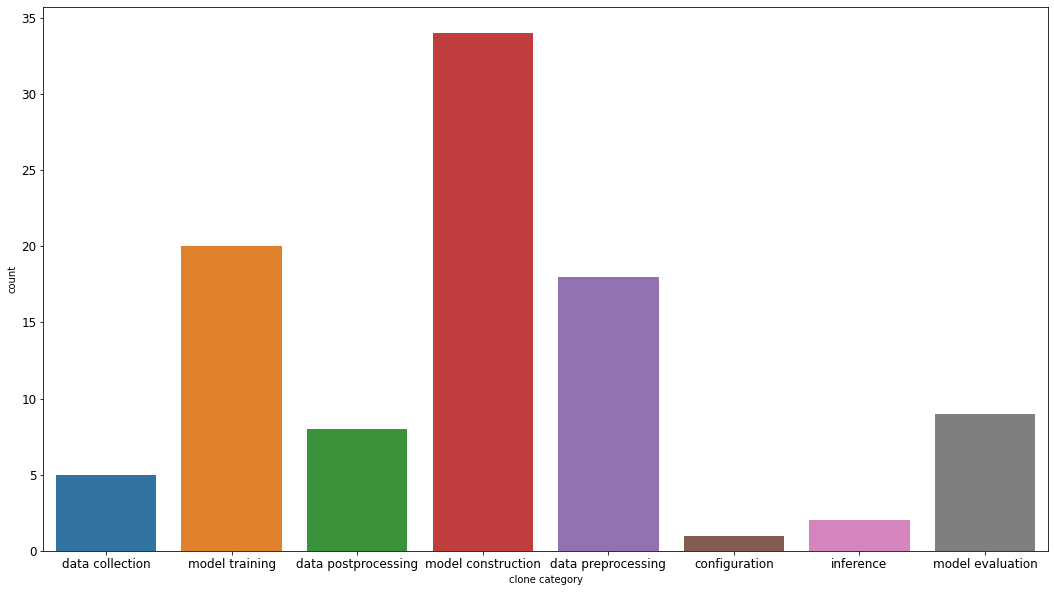

In [7]:
plt.figure(figsize=(18,10))
ax=sns.countplot('clone category', data=dl_taxonomy )
plt.xticks(size=12)
plt.xlabel('clone category')
plt.yticks(size=12)
#plt.ylabel('nb_fragment', size=12)
#with_hue(ax, fcts_df.nb_fragment, 3,8)

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 10 Text major ticklabel objects>)

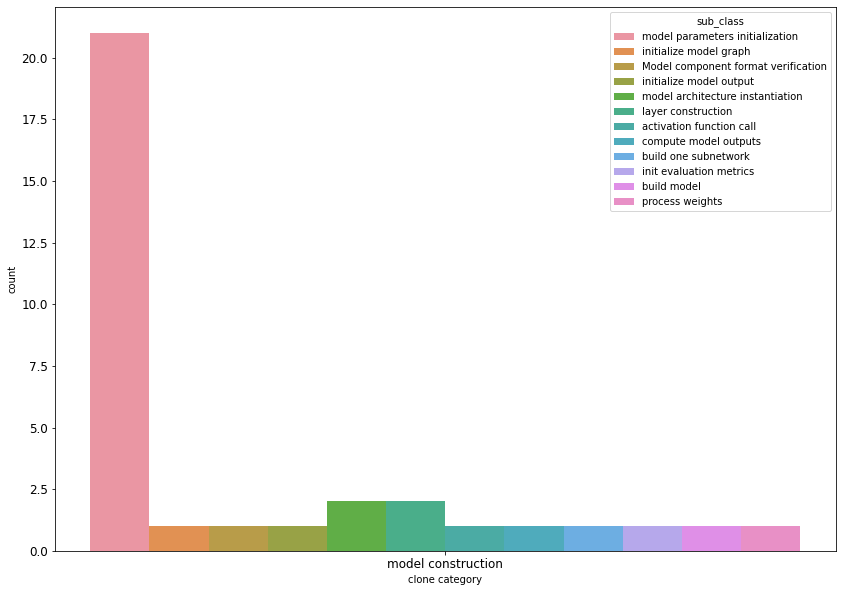

In [8]:
plt.figure(figsize=(14,10))
ax=sns.countplot('clone category', hue='sub_class', data=dl_taxonomy[dl_taxonomy['clone category']=='model construction'] )
plt.xticks(size=12)
plt.xlabel('clone category')
plt.yticks(size=12)
#plt.ylabel('nb_fragment', size=12)
#with_hue(ax, fcts_df.nb_fragment, 3,8)

(array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 7 Text major ticklabel objects>)

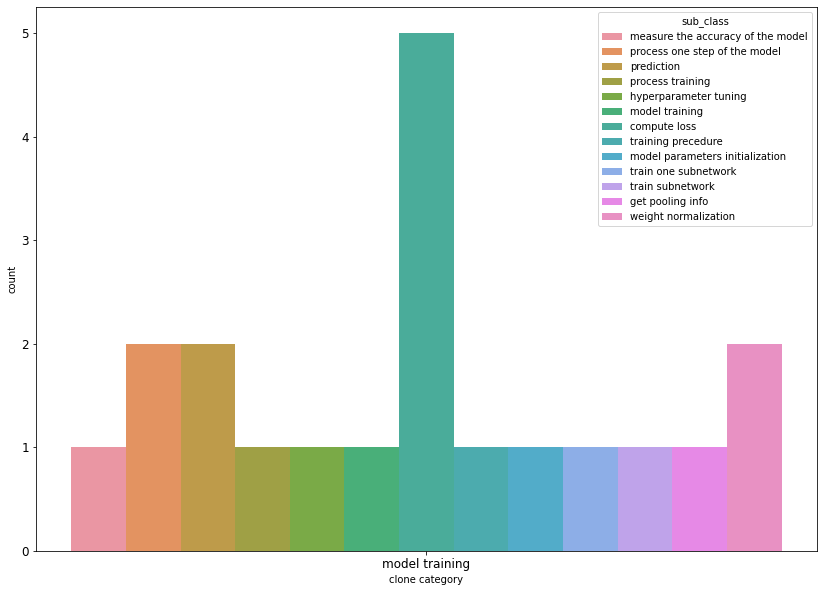

In [9]:
plt.figure(figsize=(14,10))
ax=sns.countplot('clone category', hue='sub_class', data=dl_taxonomy[dl_taxonomy['clone category']=='model training'] )
plt.xticks(size=12)
plt.xlabel('clone category')
plt.yticks(size=12)
#plt.ylabel('nb_fragment', size=12)
#with_hue(ax, fcts_df.nb_fragment, 3,8)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 <a list of 8 Text major ticklabel objects>)

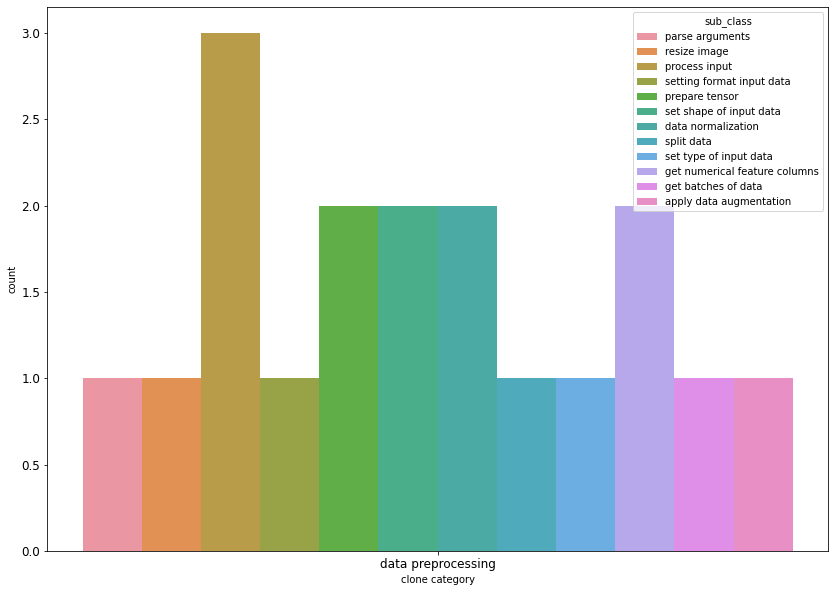

In [10]:
plt.figure(figsize=(14,10))
ax=sns.countplot('clone category', hue='sub_class', data=dl_taxonomy[dl_taxonomy['clone category']=='data preprocessing'] )
plt.xticks(size=12)
plt.xlabel('clone category')
plt.yticks(size=12)

Text(0.5, 1.0, 'Clone occurrences in DL code by category and by clone type')

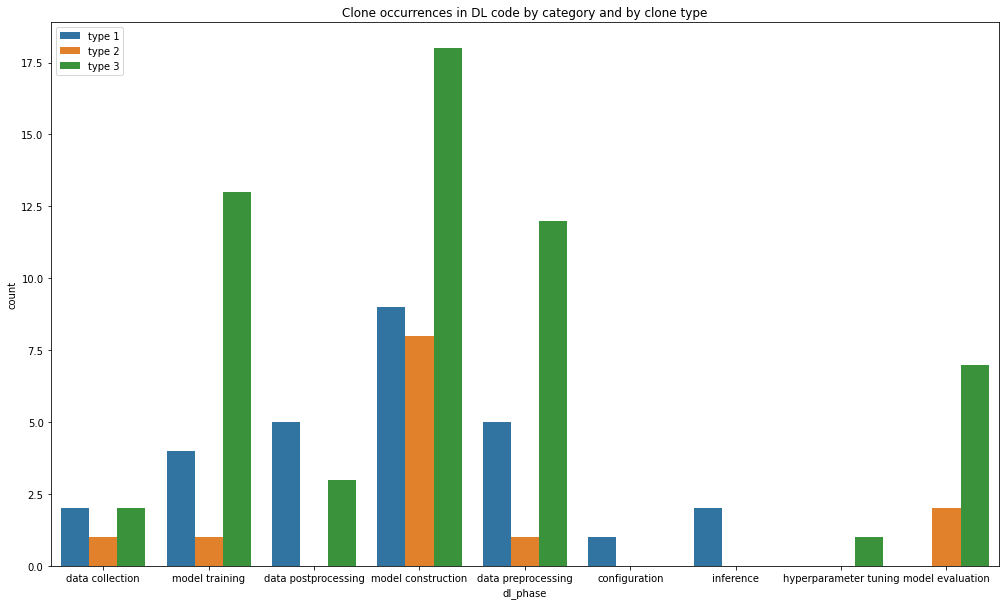

In [22]:
plt.figure(figsize=(17,10))
ml_trad_boxplot = sns.countplot(x="dl_phase", data=dl_taxonomy, hue='clone_type')
plt.legend(loc='best')
plt.title('Clone occurrences in DL code by category and by clone type')

[Text(0, 0, 'model parameters/hyperparameters initialization'),
 Text(0, 0, 'initialize model graph'),
 Text(0, 0, 'Model component format verification'),
 Text(0, 0, 'initialize model output'),
 Text(0, 0, 'model architecture instantiation'),
 Text(0, 0, 'layer construction'),
 Text(0, 0, 'activation function call'),
 Text(0, 0, 'compute model outputs'),
 Text(0, 0, 'build one subnetwork'),
 Text(0, 0, 'init evaluation metrics'),
 Text(0, 0, 'build model'),
 Text(0, 0, 'initialize weights')]

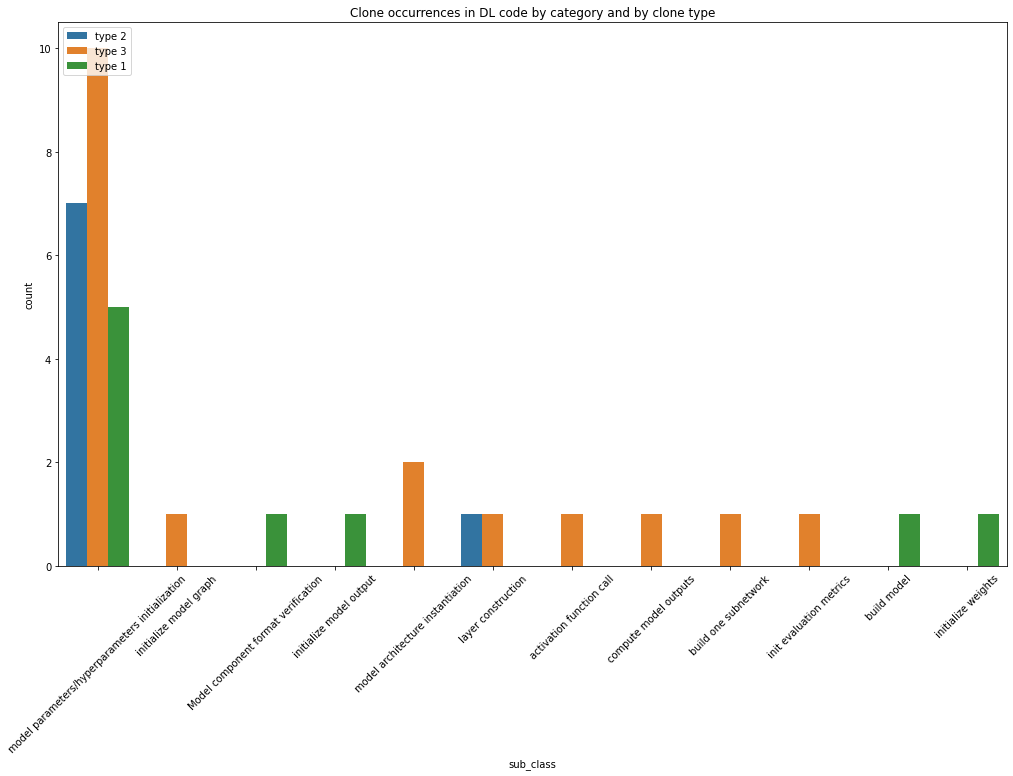

In [27]:
plt.figure(figsize=(17,10))
ml_trad_boxplot = sns.countplot(x="sub_class", data=dl_taxonomy[dl_taxonomy['dl_phase']=='model construction'], hue='clone_type')
plt.legend(loc='best')
plt.title('Clone occurrences in DL code by category and by clone type')
ml_trad_boxplot.set_xticklabels(ml_trad_boxplot.get_xticklabels(), rotation=45)

In [17]:
dl_taxonomy[dl_taxonomy['dl_phase']=='model construction']

repoName  classid  g  similarity  \
3   BerryNet       26  f         100   
4   BerryNet       27  f         100   
6   BerryNet       27  f          71   
13  BerryNet       21  f         100   
16  BerryNet       16  f         100   
20  BerryNet       19  f          71   
28   DeepCTR        1  f         100   
29   DeepCTR        6  f         100   
30   DeepCTR       12  f         100   
31   DeepCTR        6  f          73   
33   DeepCTR       15  f          89   
35   DeepCTR       17  f          70   
36   DeepCTR       19  f          71   
37   DeepCTR       20  f          70   
38   DeepCTR       23  f          70   
43   DeepCTR       22  f          72   
46   DeepCTR        1  f         100   
47   DeepCTR       10  f         100   
48    adanet       38  f          80   
50    adanet       45  f          90   
51    adanet       43  f          70   
52    adanet       31  f          77   
57    adanet        3  f          87   
60    adanet       28  f          75   
64    adanet        4  f         100   
65    adanet       19  f         100   
66    adanet       18  f         100   
68    adanet        2  f         100   
69    adanet        3  f         100   
70    adanet        2  f          80   
71    adanet        9  f          75   
76    nn-wtf        5  f          77   
83   ranking        5  f         100   
89   ranking        3  f         100   
93   ranking        7  f         100   

                                                files  \
3   ['../clone_code/dl/BerryNet/berrynet/service/t...   
4   ['../clone_code/dl/BerryNet/berrynet/service/t...   
6   {'../clone_code/dl/BerryNet/berrynet/service/t...   
13  {'../clone_code/dl/BerryNet/inference/enginese...   
16  {'../clone_code/dl/BerryNet/berrynet/engine/mo...   
20  {'../clone_code/dl/BerryNet/berrynet/engine/mo...   
28  {'../clone_code/dl/DeepCTR/deepctr/contrib/rnn...   
29  {'../clone_code/dl/DeepCTR/deepctr/contrib/rnn...   
30  ['../clone_code/dl/DeepCTR/deepctr/layers/norm...   
31  {'../clone_code/dl/DeepCTR/deepctr/models/auto...   
33  {'../clone_code/dl/DeepCTR/deepctr/contrib/rnn...   
35  {'../clone_code/dl/DeepCTR/deepctr/layers/inte...   
36  {'../clone_code/dl/DeepCTR/deepctr/layers/sequ...   
37  {'../clone_code/dl/DeepCTR/deepctr/layers/sequ...   
38  {'../clone_code/dl/DeepCTR/deepctr/layers/inte...   
43  {'../clone_code/dl/DeepCTR/deepctr/layers/util...   
46  ['../clone_code/dl/DeepCTR/deepctr/contrib/uti...   
47  ['../clone_code/dl/DeepCTR/deepctr/layers/sequ...   
48  {'../clone_code/dl/adanet/research/improve_nas...   
50  {'../clone_code/dl/adanet/research/improve_nas...   
51  {'../clone_code/dl/adanet/research/improve_nas...   
52  {'../clone_code/dl/adanet/adanet/autoensemble/...   
57  {'../clone_code/dl/adanet/adanet/ensemble/stra...   
60  {'../clone_code/dl/adanet/adanet/core/testing_...   
64  {'../clone_code/dl/adanet/research/improve_nas...   
65  ['../clone_code/dl/adanet/research/improve_nas...   
66  ['../clone_code/dl/adanet/research/improve_nas...   
68  {'../clone_code/dl/adanet/adanet/core/testing_...   
69  {'../clone_code/dl/adanet/adanet/experimental/...   
70  {'../clone_code/dl/adanet/adanet/core/estimato...   
71  {'../clone_code/dl/adanet/adanet/autoensemble/...   
76  {'../clone_code/dl/nn-wtf/nn_wtf/predictor.py....   
83  {'../clone_code/dl/ranking/tensorflow_ranking/...   
89  {'../clone_code/dl/ranking/tensorflow_ranking/...   
93  ['../clone_code/dl/ranking/tensorflow_ranking/...   

                                           startlines  \
3                                            [32, 37]   
4                                [36, 37, 49, 84, 85]   
6                            {32, 36, 37, 49, 84, 85}   
13                                           {24, 43}   
16                                           {33, 28}   
20                                       {33, 50, 28}   
28                                           {56, 67}   
29                                        {1275, 987} 

Text(0.5, 1.0, 'Clone occurrences in DL code by category and by clone type')

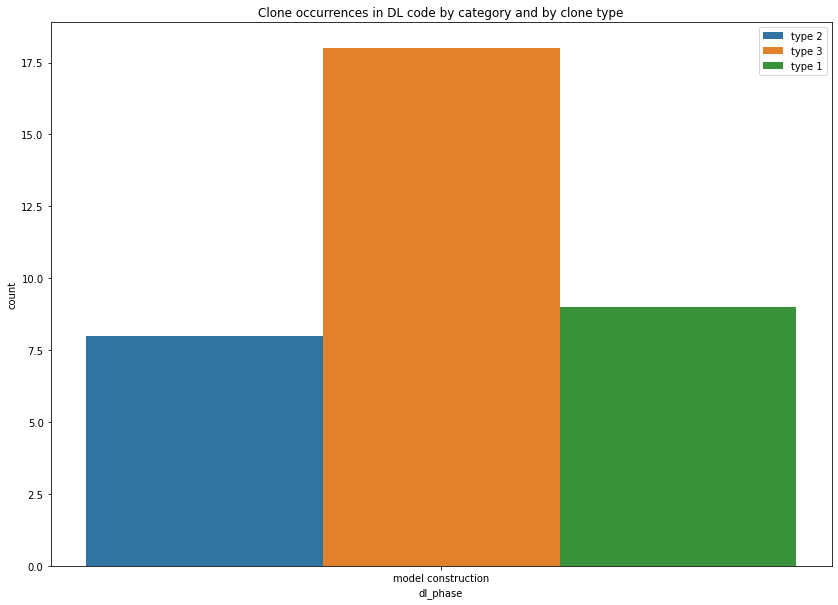

In [19]:
plt.figure(figsize=(14,10))
ml_trad_boxplot = sns.countplot(x="dl_phase", data=dl_taxonomy[dl_taxonomy['dl_phase']=='model construction'], hue='clone_type')
plt.legend(loc='best')
plt.title('Clone occurrences in DL code by category and by clone type')